In [5]:
library(ggplot2)
library(dplyr)
library(readr)
library(caret)
library(car)
library(tidyr)

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



In [8]:
set.seed(0)
setwd("C:/Users/Jeane/MSDS/Proj2")
df_train = read.csv("C:/Users/Jeane/MSDS/Proj2/airbnb/train_users_2.csv")
df_test = read.csv("C:/Users/Jeane/MSDS/Proj2/airbnb/test_users.csv")
age_gender_bkts <- read.csv("C:/Users/Jeane/MSDS/Proj2/airbnb/age_gender_bkts.csv")
countries <- read.csv("C:/Users/Jeane/MSDS/Proj2/airbnb/countries.csv")

# Looking at age relationships

In [18]:
df_train$age[which(df_train$age > 1900)] <- 2016 - df_train$age[which(df_train$age > 1900)]
df_train$age[which(df_train$age > 110)] <- NA
df_train$age[which(df_train$age < 18)] <- NA
df_train <- subset(df_train, !is.na(age))

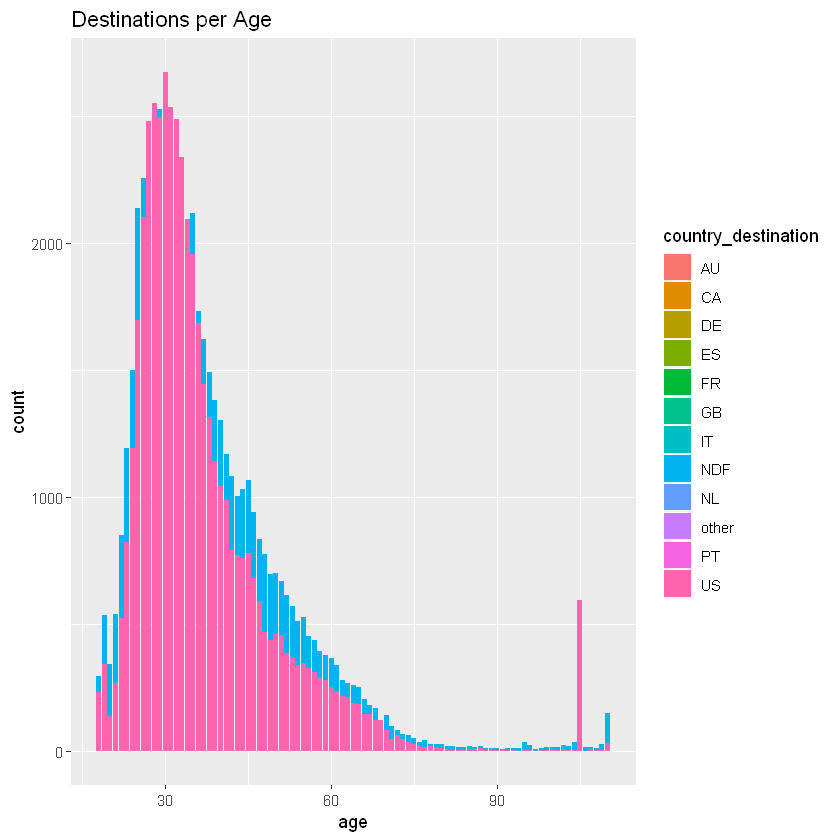

In [21]:
ggplot(df_train, aes(age, fill=country_destination)) +
    geom_bar(position="identity") +
    ggtitle('Destinations per Age')


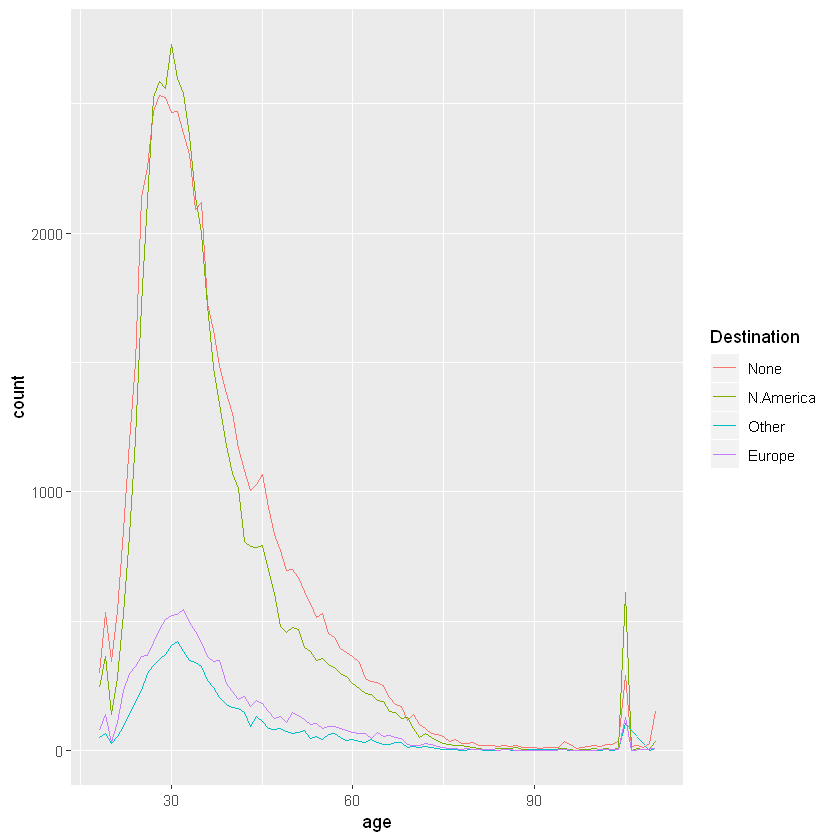

In [23]:
reduceDest <- function(usrs) {
    # collapse destination into four categories
    # Arg: usrs data frame (same Arg and value in each of these functions)
    usrs$Destination <- NA
    usrs$Destination[which(usrs$country_destination == "NDF")] <- 1
    usrs$Destination[which(usrs$country_destination %in% c("US", "CA"))] <- 2
    usrs$Destination[which(usrs$country_destination == "other")] <- 3
    usrs$Destination[which(usrs$country_destination %in% 
                           c("AU", "DE", "ES", "FR", "GB", "IT", "NL", "PT"))] <- 4
    usrs$Destination <- factor(usrs$Destination, labels = c("None", "N.America", 
                                                    "Other", "Europe"))
    usrs
}

train.f5 <- reduceDest(df_train)

train.age <- group_by(train.f5, Destination, age) %>%
    summarise(count = n())

ggplot(train.age, aes(x=age, y=count, group=Destination, colour=Destination)) +
    geom_line()

# Looking at gender relationships

In [9]:
table(df_train$gender)
table(df_test$gender)


-unknown-    FEMALE      MALE     OTHER 
    95688     63041     54440       282 


-unknown-    FEMALE      MALE     OTHER 
    33792     14483     13769        52 

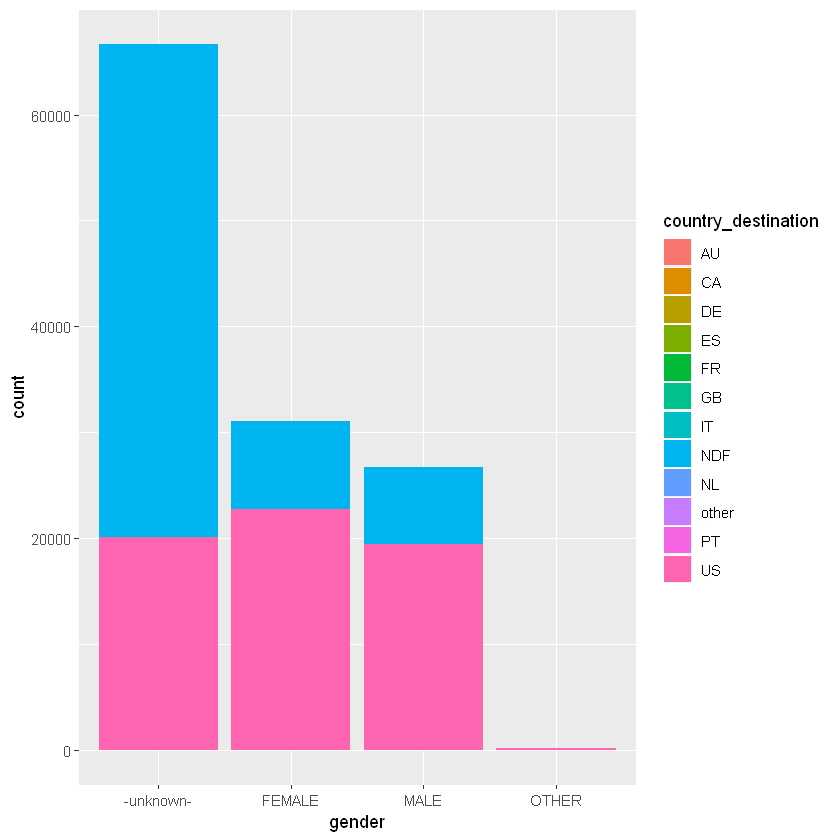

In [13]:
ggplot(df_train, aes(gender, fill=country_destination)) +
    geom_bar(position="identity")

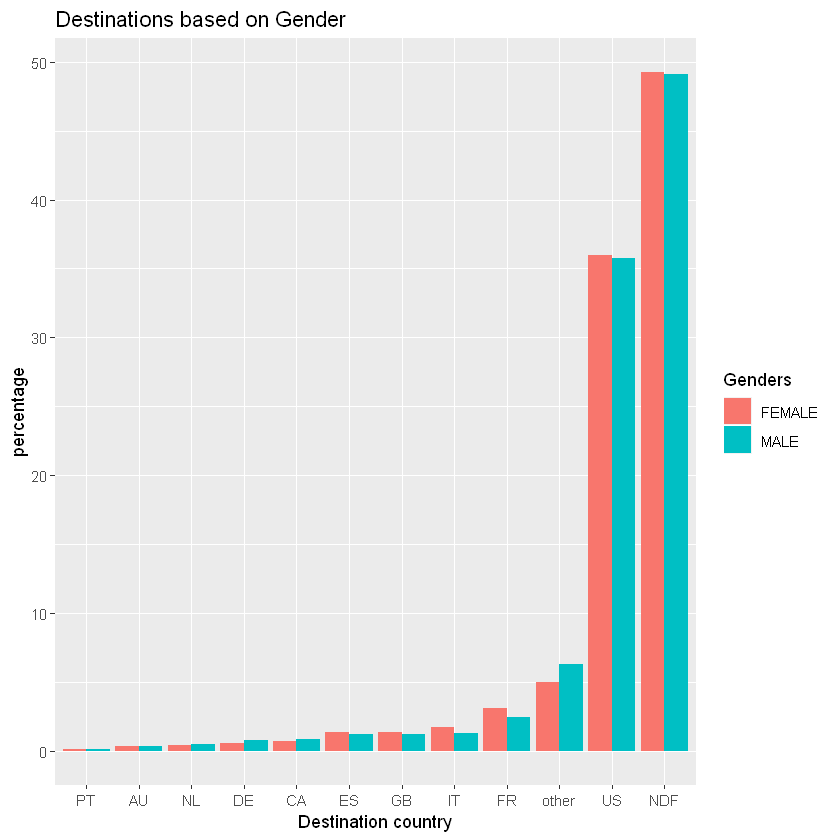

In [17]:

train.f1 <- group_by(df_train, country_destination, gender) %>%
    summarise(sum = n())


train.f2 <- filter(train.f1, gender == 'FEMALE' | gender == 'MALE')

totalFemale <- sum(train.f2[train.f2$gender == 'FEMALE',]$sum)
totalMale <- sum(train.f2[train.f2$gender == 'MALE',]$sum)

train.female <- train.f2 %>% 
    filter(gender == 'FEMALE')%>% 
    mutate(percentage = sum / totalFemale*100)    

train.male <- train.f2 %>% 
    filter(gender == 'MALE')%>% 
    mutate(percentage = sum / totalMale*100)    


train.f2 <- rbind(train.female, train.male)

ggplot(train.f2, aes(x=reorder(country_destination, percentage), 
                     y=percentage, fill=gender)) + 
    geom_bar(position='dodge', stat='identity') +
    xlab('Destination country') +
    guides(fill=guide_legend(title='Genders'))+
    ggtitle('Destinations based on Gender')